# Name - Pranjal Sarkari

# Data Science & Business Analytics

# Task6 - Prediction using Decision Tree Algorithm

# Objective:

## In this task we will create the Decision Tree classifier and visualize it graphically. So if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Importing all necessary libraries and dataset for this task.

In [1]:
# importing all useful libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
# importing the dataset 
iris = datasets.load_iris()
data = pd.DataFrame(iris.data,columns=iris.feature_names)
print(data)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


## Information about data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Description of data

In [4]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Checking for null values

In [5]:
data.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


## Analysis and Training of the data

In [6]:
# function to import the dataset
def import_data():
    iris = datasets.load_iris()
    data = pd.DataFrame(iris.data,iris.target,columns=iris.feature_names)
    data.reset_index(inplace=True)
    print("Length of dataset",len(data))
    print("Shape of dataset",data.shape)
    print("Dataset:",data.head())
    return data

In [7]:
# split function to split the dataset
def split_dataset(data):
    x = data.values[:,1:4]
    y = data.values[:,0]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
    return x,y,x_train,x_test,y_train,y_test

In [8]:
# function to perform training with giniIndex
def training_gini(x_train,x_test,y_train):
    # creation of  classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=3,min_samples_leaf=5)
    # training
    clf_gini.fit(x_train,y_train)
    return clf_gini

In [9]:
# function to perform training with entropy
def training_entropy(x_train,x_test,y_train):
    # decision tree with entropy
    clf_entropy = DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3,min_samples_leaf=5)
    
    # training
    clf_entropy.fit(x_train,y_train)
    return clf_entropy

In [10]:
# function to make predictions
def prediction(x_test,clf_object):
    # prediction on test with giniindex
    y_pred = clf_object.predict(x_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [11]:
# function to calculate accuracy
def calc_accuracy(y_test,y_pred):
    print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
    print("Accuracy:",accuracy_score(y_test,y_pred)*100)
    print("Report:",classification_report(y_test,y_pred))

In [12]:
# main code
def fun():
    #Building phase
    data=import_data()
    x,y,x_train,x_test,y_train,y_test=split_dataset(data)
    clf_gini=training_gini(x_train,x_test,y_train)
    clf_entropy=training_entropy(x_train,x_test,y_train)
    print('\n')
    print("Results using Gini Index:")
    
    
    # prediction using gini
    y_pred_gini=prediction(x_test,clf_gini)
    calc_accuracy(y_test,y_pred_gini)
    print('\n')
    print("Results using Entropy:")
    
    
    # prediction using entropy
    y_pred_entropy=prediction(x_test,clf_entropy)
    calc_accuracy(y_test,y_pred_entropy)

# calling main function
if __name__=="__main__":
    fun();

Length of dataset 150
Shape of dataset (150, 5)
Dataset:    index  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0      0                5.1               3.5                1.4   
1      0                4.9               3.0                1.4   
2      0                4.7               3.2                1.3   
3      0                4.6               3.1                1.5   
4      0                5.0               3.6                1.4   

   petal width (cm)  
0               0.2  
1               0.2  
2               0.2  
3               0.2  
4               0.2  


Results using Gini Index:
Predicted values:
[2. 0. 2. 0. 1. 2. 0. 0. 2. 0. 0. 2. 0. 0. 2. 1. 1. 2. 2. 2. 2. 0. 2. 0.
 1. 2. 1. 0. 1. 2. 1. 1. 2. 0. 0. 1. 0. 1. 2. 2. 0. 1. 2. 2. 0.]
Confusion Matrix: [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
Accuracy: 95.55555555555556
Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0      

## Visualizing our dataset through Tree

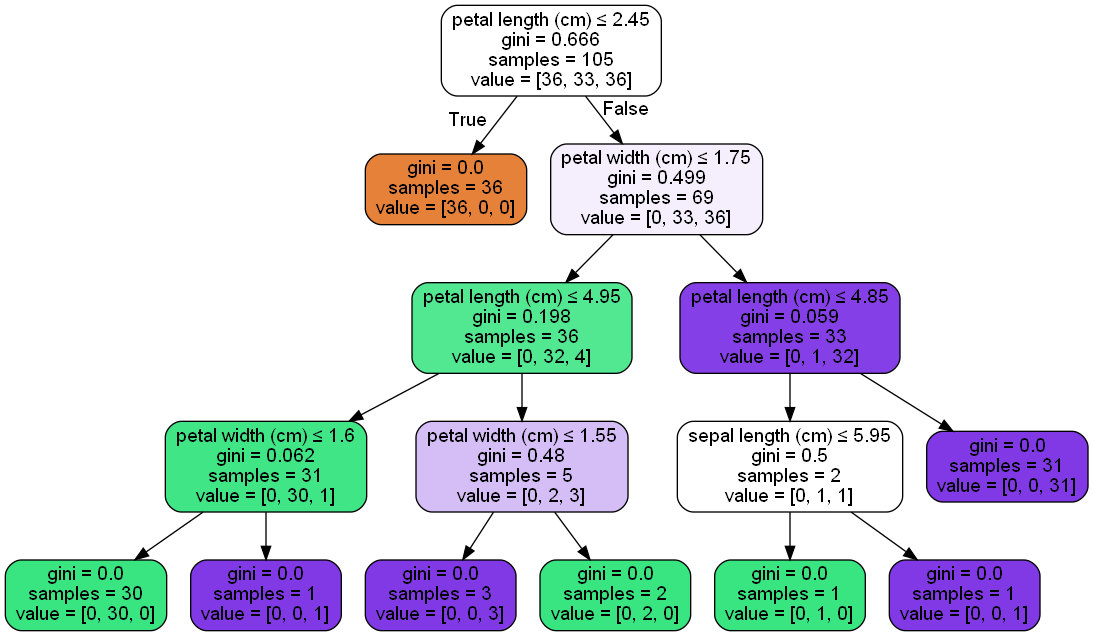

In [13]:
from io import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
y=iris.target
Feature_cols=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.3,random_state=10)
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=Feature_cols)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Subcategory.png')
Image(graph.create_png())